source: https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda/notebook


In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
!dir ..


 Volume in drive C is Windows
 Volume Serial Number is 5EBE-CD33

 Directory of C:\Users\kerrs\Desktop

09/23/2019  03:52 PM    <DIR>          .
09/23/2019  03:52 PM    <DIR>          ..
09/21/2019  04:22 PM    <DIR>          .ipynb_checkpoints
09/23/2019  09:44 AM            12,248 11Sept_exercises-clean.ipynb
09/22/2019  03:06 PM            20,651 16Sept_Practice_Problems-clean.ipynb
09/20/2019  08:44 PM            28,780 16Sept_Practice_Problems-solved.ipynb
09/18/2019  11:13 AM    <DIR>          2016-new-coder-survey-
09/01/2019  07:33 PM         2,746,416 Blockchain Revolution ( PDFDrive.com ).pdf
08/06/2019  05:56 PM         3,942,436 bookmarks.html
09/22/2019  04:24 PM           189,032 Cannabis_Stocks.PNG
08/06/2019  06:10 PM    <DIR>          Data
09/23/2019  03:48 PM    <DIR>          Data-files
08/25/2019  02:41 PM         3,036,296 definitive-guide-to-marketing-metrics-marketing-analytics.pdf
09/16/2019  11:27 AM             3,067 Dictionary_Exercises.txt
09/17/2019  09:15 

In [3]:
df = pd.read_csv(r"C:\Users\kerrs\Desktop\Data-files\dataframe.csv")
df_all_timestamps = pd.read_csv(r"C:\Users\kerrs\Desktop\Data-files\dataframe_all_timestamps.csv")

In [4]:
import numpy as np

df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [5]:
def stringify(row):
    return str(row['publish_date']) + ' ' + str(row['publish_time'])

df_all_timestamps.loc[:,'string_date_time'] = \
                            df_all_timestamps.apply(stringify, axis=1)

df_all_timestamps.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df_all_timestamps['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)


#make a new column in df called 'publish_timestamp' 
#that is a datetime object

df.loc[:,'string_date_time'] = df.apply(stringify, axis=1)
df.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')
df = df.drop('string_date_time', axis=1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 24 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [7]:
import pandasql as ps

In [9]:
pysqldf = lambda q: sqldf(q, globals())

In [18]:
q1 = "SELECT * FROM df WHERE title LIKE  '%Game of Thrones%' LIMIT 10;"

In [20]:
q2 = "SELECT * FROM df WHERE title LIKE  '%Steven Universe%' LIMIT 10;"

In [24]:
print(ps.sqldf(q2, locals()))

      video_id trending_date  \
0  QC9YKyu2J9Y    2018-01-26   
1  CFRpBoFeKSQ    2018-02-26   
2  4kFywSnB8ao    2018-03-26   
3  59grb198Yis    2018-03-28   
4  La3KKixHSgY    2018-04-22   
5  p1pH42zrq9A    2018-04-25   
6  aG5X7L9K15Q    2018-05-02   
7  15Rgx-B8ao0    2018-05-02   
8  KlrrfkcCMBo    2018-05-02   
9  QA-TmvSWj0o    2018-05-08   

                                               title  \
0  El vídeo PROHIBIDO de STEVEN UNIVERSE | Jamás ...   
1               Steven Universe Fan Chat con Alfrely   
2                     Ghost (Song) | Steven Universe   
3  Steven Universe | El nacimiendo de las Crystal...   
4  Steven Universe | El Pasado De Perla | Fly Me ...   
5  REVELADO! | COMO DIAMANTE ROSA ESTA VIVA! | ST...   
6  (Steven Universe Fan Animation) Your Mother An...   
7  Steven Universe | Yellow and Blue Diamond On E...   
8  (MEGA SPOILER Leaks) Bismuth, Diamonds, etc「St...   
9  Steven Universe - That Distant Shore (Latin Am...   

                              

In [22]:
SU  = ps.sqldf(q2, locals())

In [23]:
SU.head()

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp
0,QC9YKyu2J9Y,2018-01-26,El vídeo PROHIBIDO de STEVEN UNIVERSE | Jamás ...,The Youman Show - EL CANAL DE LAS LOCURAS,24,Entertainment,2018-01-26,00:45:00,"youman|""the youman""|""steven""|""universe""|""steve...",103571,15839,298,1195,https://i.ytimg.com/vi/QC9YKyu2J9Y/default.jpg,0,0,0,Dale al botón de like para mas vídeos!! Recuer...,MX,11.548022,9.670294,5.700444,7.086738,2018-01-26 00:45:00.000000
1,CFRpBoFeKSQ,2018-02-26,Steven Universe Fan Chat con Alfrely,Cartoon Network LA,24,Entertainment,2018-02-24,22:47:54,[none],245608,16211,1008,3199,https://i.ytimg.com/vi/CFRpBoFeKSQ/default.jpg,0,0,0,¡Acompáñanos en nuestro Steven Universe Live c...,MX,12.411496,9.693507,6.916715,8.070906,2018-02-24 22:47:54.000000
2,4kFywSnB8ao,2018-03-26,Ghost (Song) | Steven Universe,Ford in a Bikini,10,Music,2018-03-26,03:55:51,"VideoStarApp|""vs7.1.3""|""Steven Universe""",59429,2798,69,337,https://i.ytimg.com/vi/4kFywSnB8ao/default.jpg,0,0,0,FOLLOW ME ON MY OTHER SOCIAL MEDIA:\n\nTwitter...,MX,10.992554,7.937017,4.248495,5.823046,2018-03-26 03:55:51.000000
3,59grb198Yis,2018-03-28,Steven Universe | El nacimiendo de las Crystal...,Alan Quartz C.,24,Entertainment,2018-03-26,15:19:31,"Pink diamond|""diamante rosa""|""rose cuarzo""|""ro...",494276,7656,280,473,https://i.ytimg.com/vi/59grb198Yis/default.jpg,0,0,0,Historia del capítulo Your Mother And Mine (Tu...,MX,13.110851,8.943376,5.638355,6.161207,2018-03-26 15:19:31.000000
4,La3KKixHSgY,2018-04-22,Steven Universe | El Pasado De Perla | Fly Me ...,Rosedot Universe,22,People & Blogs,2018-04-22,00:49:52,[none],8102,415,19,80,https://i.ytimg.com/vi/La3KKixHSgY/default.jpg,0,0,0,Perla!!!\n\nRedes sociales sigueme 7w7\n* Yout...,MX,8.999990,6.030685,2.995732,4.394449,2018-04-22 00:49:52.000000


In [19]:
print(ps.sqldf(q1, locals()))

      video_id trending_date  \
0  LfAZtfAqpxc    2017-11-15   
1  UrhqmMRv1gQ    2017-11-29   
2  LctCTZKdO18    2017-12-15   
3  HdCPQk0jj3k    2017-12-22   
4  siJKkohoFLg    2018-01-06   
5  Eq6ijRAJRRs    2018-01-07   
6  yuRppUasjes    2018-01-09   
7  Uj6iT_zQTk8    2018-01-15   
8  CSxaVoBXwNI    2018-01-19   
9  NkgW3SLLZgU    2018-01-25   

                                               title  \
0  Das neue Game of Thrones? Amazon plant Herr de...   
1  Rhaegar: was Jon’s father the true hero of Gam...   
2              Knightfall: The Next Game of Thrones?   
3           J'ai pas vu Game of Thrones - Vlogmas 21   
4  TRENDING 5 ENERO - JUKILOP 5M, ¿DE DÓNDE VIENE...   
5  Game of Thrones saison 8 Théories et infos sur...   
6  GAME OF THRONES: Staffel 8 erst 2019 | STAR WA...   
7  Maisie Williams Reveals Arya Stark's Game of T...   
8  Game of Thrones meets Castlevania & Wer ist ei...   
9  Jason Momoa Struggled to Book Gigs After Game ...   

                            ch

In [11]:
print ps.pysqldf("SELECT * FROM df WHERE title LIKE " "%Game of Thrones%"" LIMIT 10;").head()

SyntaxError: invalid syntax (<ipython-input-11-5ec65156542f>, line 1)

In [5]:
df_all_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356350 entries, 0 to 356349
Data columns (total 19 columns):
video_id                  356350 non-null object
trending_date             356350 non-null object
title                     356350 non-null object
channel_title             356350 non-null object
category_id               356350 non-null int64
category                  356350 non-null object
publish_date              356350 non-null object
publish_time              356350 non-null object
tags                      356350 non-null object
views                     356350 non-null int64
likes                     356350 non-null int64
dislikes                  356350 non-null int64
comment_count             356350 non-null int64
thumbnail_link            356350 non-null object
comments_disabled         356350 non-null bool
ratings_disabled          356350 non-null bool
video_error_or_removed    356350 non-null bool
description               356350 non-null object
country           

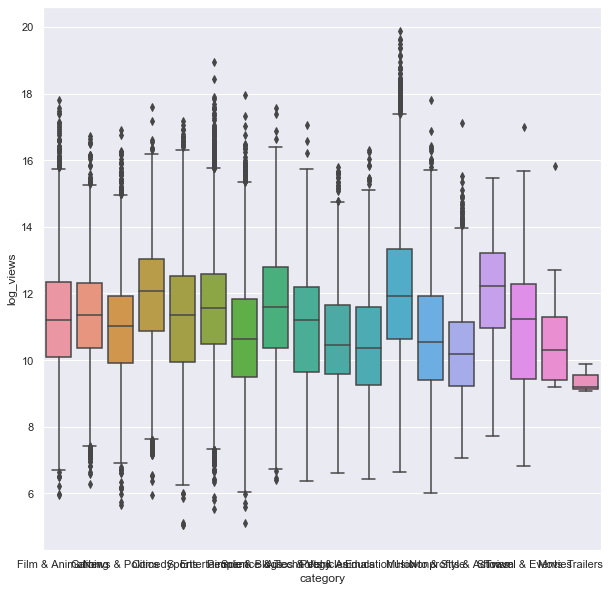

In [27]:
plt.figure(figsize = (10,10))
sns.boxplot(x = "category", y = 'log_views', data = df)

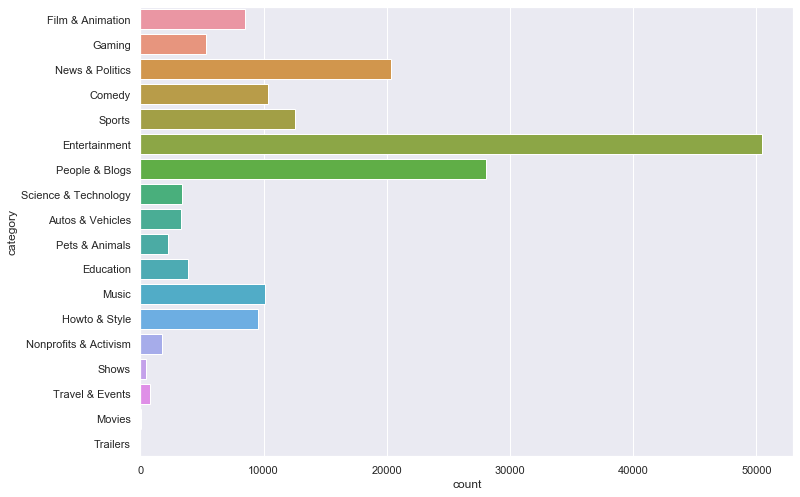

In [22]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax = sns.countplot(y = 'category', data = df)


In [1]:
sns.boxplot(y = "category", x = 'log_views', data = df)

NameError: name 'sns' is not defined

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count


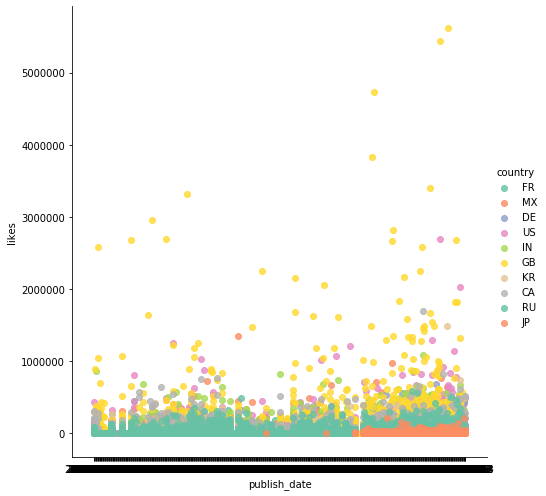

SyntaxError: invalid syntax (<ipython-input-21-c82a47831d43>, line 4)